In [1]:
# validate_onnx.py
import numpy as np
import onnxruntime as ort
import torch

# Load the ONNX model
ONNX_OUTPUT_PATH = "/nfs/norasys/notebooks/camaret/model_checkpoints/nnInteractive_v1.0.onnx"

session = ort.InferenceSession(ONNX_OUTPUT_PATH)

# Create test input
test_input = np.zeros((1, 8, 64, 128, 128), dtype=np.float32)
# Add a point interaction
test_input[0, 4, 32, 64, 32] = 1.0  # point+ channel (index 4)

# Run inference
outputs = session.run(None, {'combined_input': test_input})
print(f"Output shape: {outputs[0].shape}")

Output shape: (1, 2, 64, 128, 128)


In [2]:
IMAGE_FILENAME = "/nfs/data/nii/data1/Analysis/GPUnet/ANALYSIS_incontext/amos22/amos22/imagesVa/amos_0311.nii.gz"  # Specify the input image filename
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk

input_image = sitk.ReadImage(IMAGE_FILENAME)
img = sitk.GetArrayFromImage(input_image)[None]  # Ensure shape (1, x, y, z)


img.shape

(1, 198, 512, 512)

In [3]:
from scipy.ndimage import zoom

def resize_preserve_content(arr, target_shape):
    """Resize array to target shape using interpolation to preserve all content."""
    # Calculate zoom factors for each dimension
    factors = [t/s for t, s in zip(target_shape, arr.shape)]
    
    # Apply zoom with interpolation
    return zoom(arr, factors, order=1)

# Usage
reshaped_img = resize_preserve_content(img, (1, 64, 128, 128))
print(f"Original shape: {img.shape}, New shape: {reshaped_img.shape}")

img = reshaped_img

Original shape: (1, 198, 512, 512), New shape: (1, 64, 128, 128)


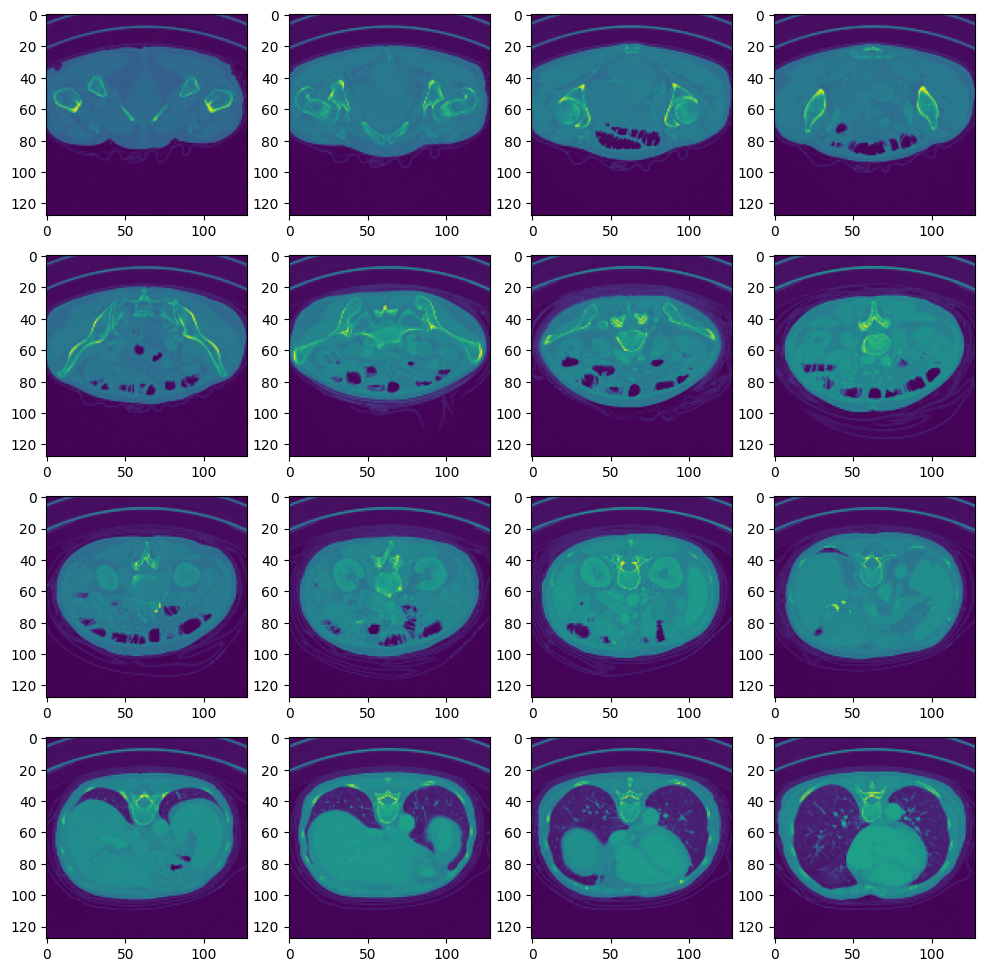

In [4]:
plt.style.use("default")
fig,axes = plt.subplots(4,4, figsize =(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(img[0,4*i,:,:])
plt.show()



In [5]:
img_input = np.zeros((1, 8, 64, 128, 128), dtype=np.float32)
img_input[0,0,:,:,:] = img

# add a point at 60, 50, 60 
img_input[0, 4, 60, 50, 30 ] = 1 # point+ channel (index 4)

# Run inference
outputs = session.run(None, {'combined_input': test_input})



In [6]:
outputs[0].shape

(1, 2, 64, 128, 128)

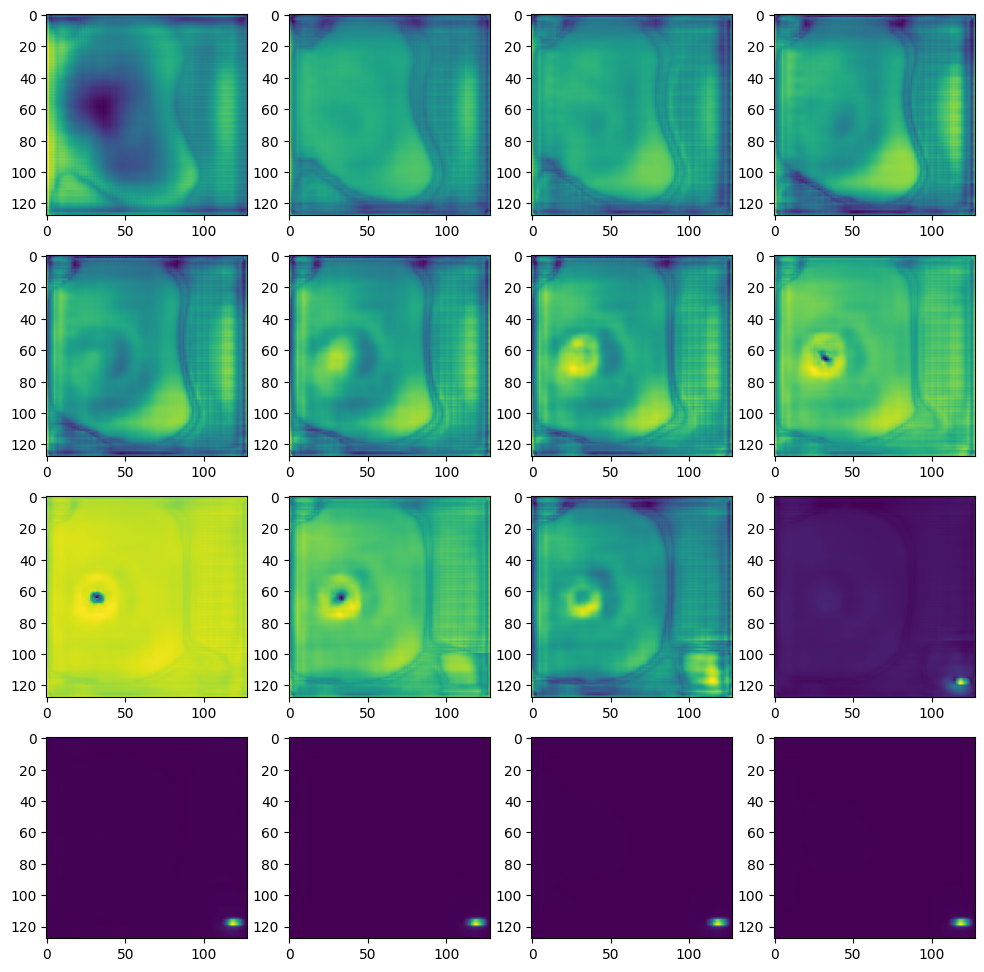

In [7]:
plt.style.use("default")
fig,axes = plt.subplots(4,4, figsize =(12,12))
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(outputs[0][0,0,4*i,:,:])
plt.show()

In [8]:
outputs[0].max()

np.float32(688.60974)